<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/GoogleDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleDataset.csv')
df.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
5,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
6,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000
7,2020-01-09 00:00:00+00:00,70.73309326,70.98950195,71.43399811,70.51049805,71.09649658,33200000
8,2020-01-10 00:00:00+00:00,71.18992615,71.44799805,71.74700165,70.98000336,71.47350311,26258000
9,2020-01-13 00:00:00+00:00,71.74143219,72.00150299,72.0739975,71.26850128,71.76249695,30730000


EDA

In [3]:
# Displaying the columns:
df.columns

Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [6]:
# Displaying the rows and columns
df.shape

(1260, 7)


In [4]:
# Displaying the information:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1260 non-null   object
 1   Adj Close  1259 non-null   object
 2   Close      1259 non-null   object
 3   High       1259 non-null   object
 4   Low        1259 non-null   object
 5   Open       1259 non-null   object
 6   Volume     1259 non-null   object
dtypes: object(7)
memory usage: 69.0+ KB


In [12]:
# Description
df.describe(include = 'all')

,Price,Adj Close,Close,High,Low,Open,Volume
count,1260,1259,1259,1259,1259,1259,1259
unique,1260,1240,1236,1224,1229,1221,1252
top,2024-12-31 00:00:00+00:00,105.5872421,105.9700012,138,128.9600067,138.5,22288000
freq,1,3,3,3,2,3,3


In [13]:
# Displaying the type of data
df.dtypes

,0
Price,object
Adj Close,object
Close,object
High,object
Low,object
Open,object
Volume,object


2. Data Preparation

Checking for the missing & duplicate values:

In [8]:
# missing values:
missing_values =  df.isnull().sum()
print(missing_values)
# duplicate values:
duplicate_values = df.duplicated().sum()
print(duplicate_values)

Price        0
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
dtype: int64
0


# Handling Outliers

In [15]:
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

Q1 = df['Volume'].quantile(0.25)
Q3 = df['Volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outliers = df[(df['Volume'] >= lower_bound) & (df['Volume'] <= upper_bound)].copy()

print('Before removing outliers:', len(df))
print('After removing outliers:', len(df_outliers))

Before removing outliers: 1260
After removing outliers: 1188


# Univariate Analysis

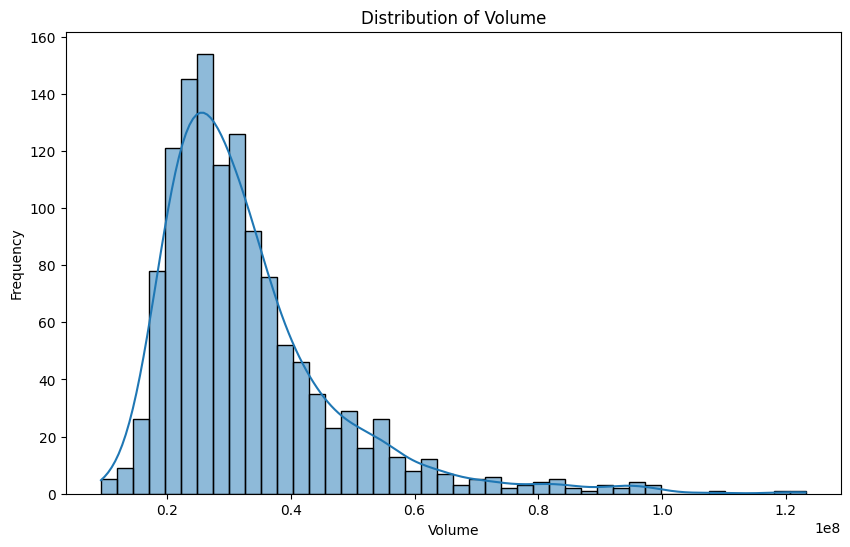

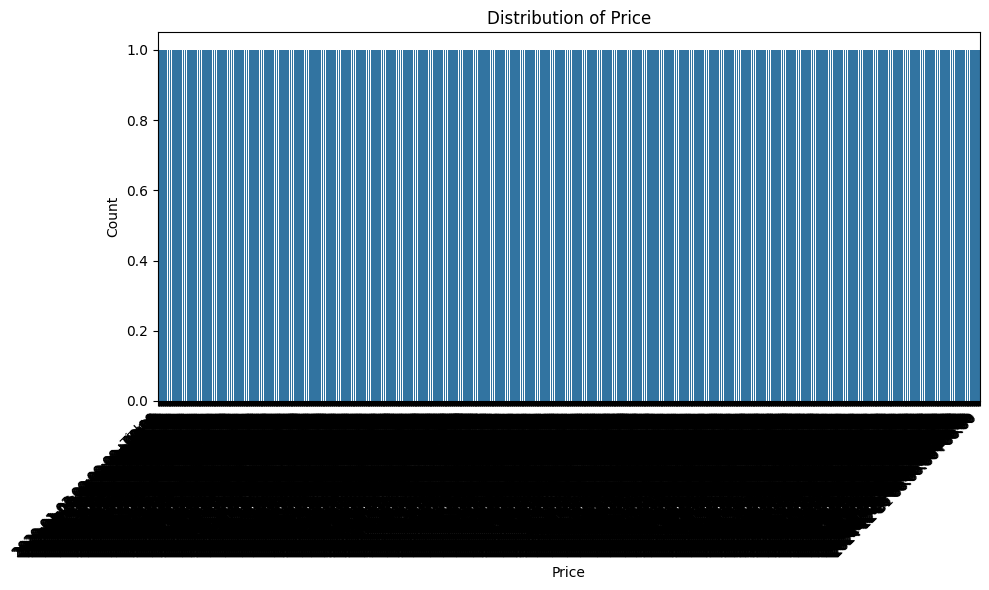

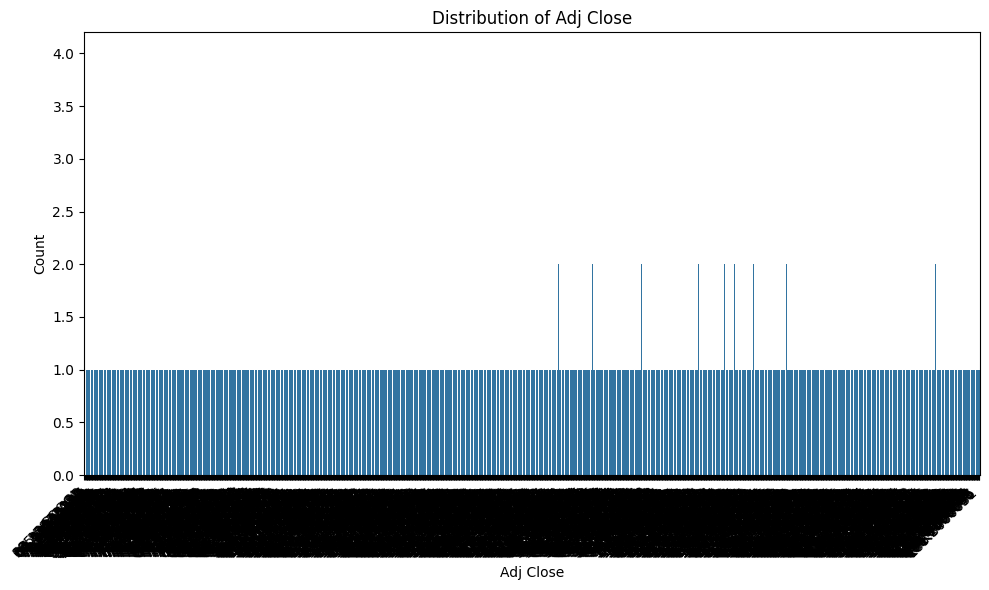

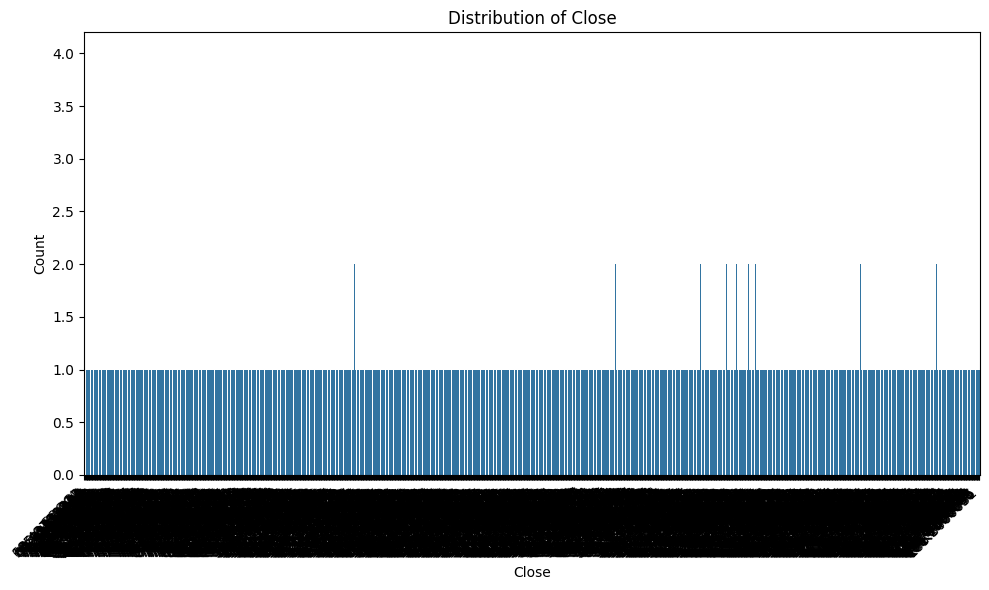

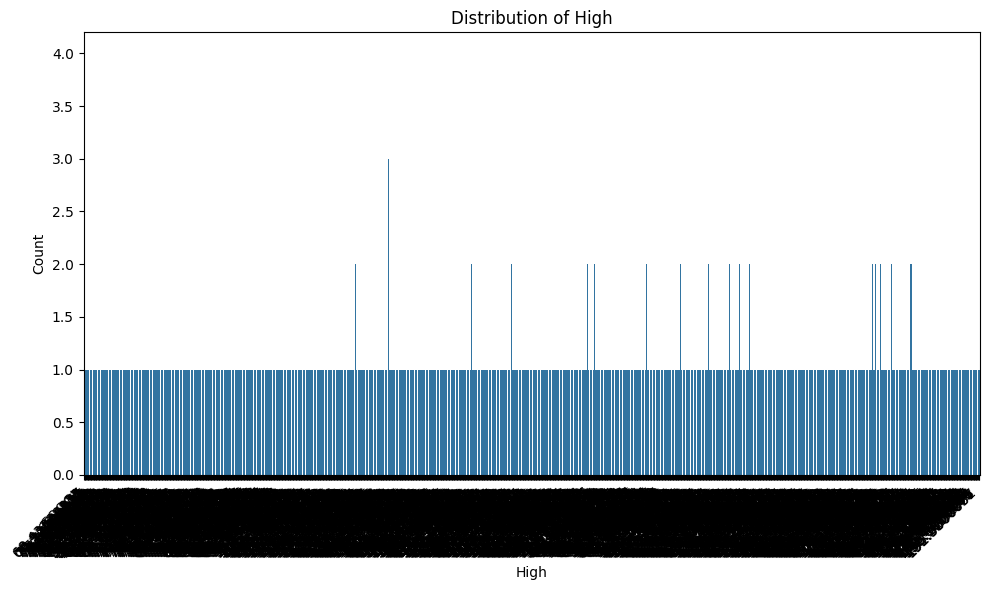

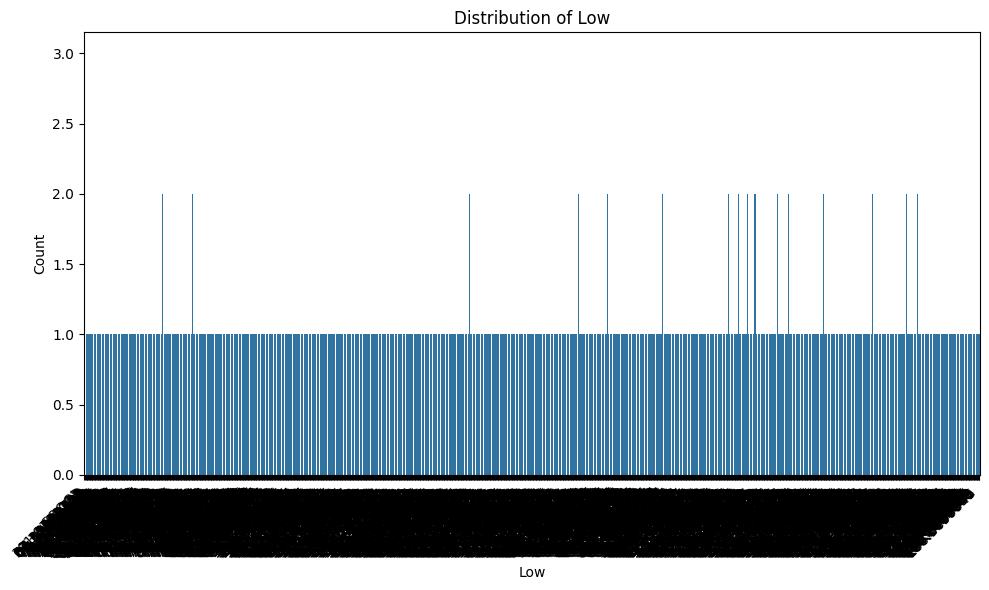

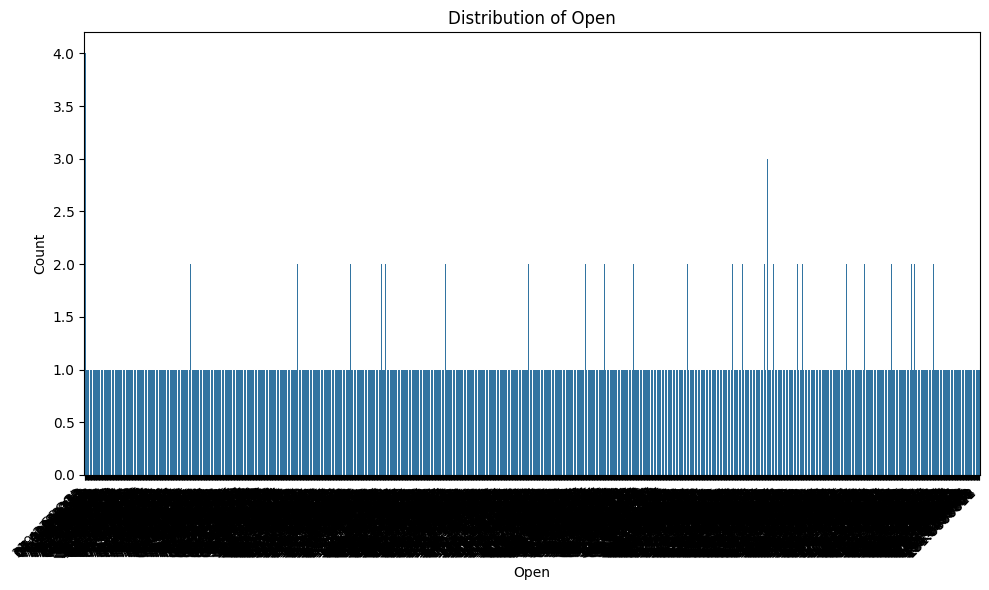

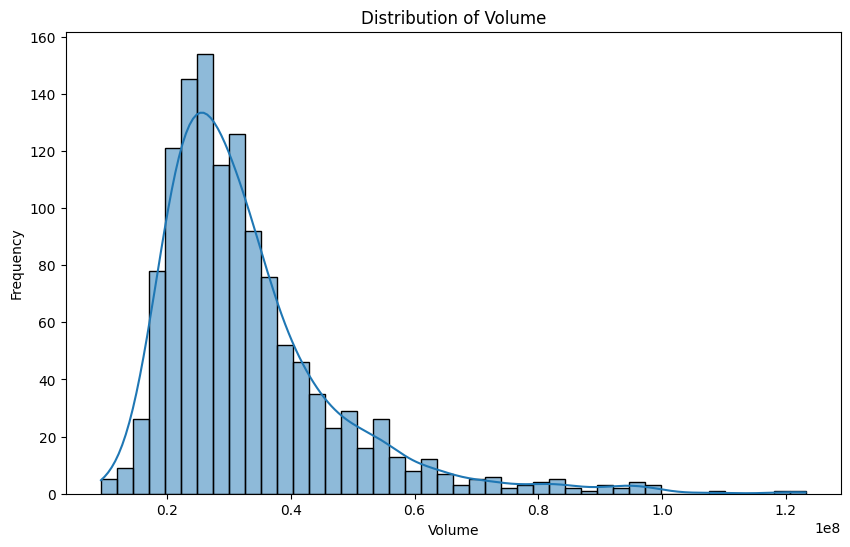

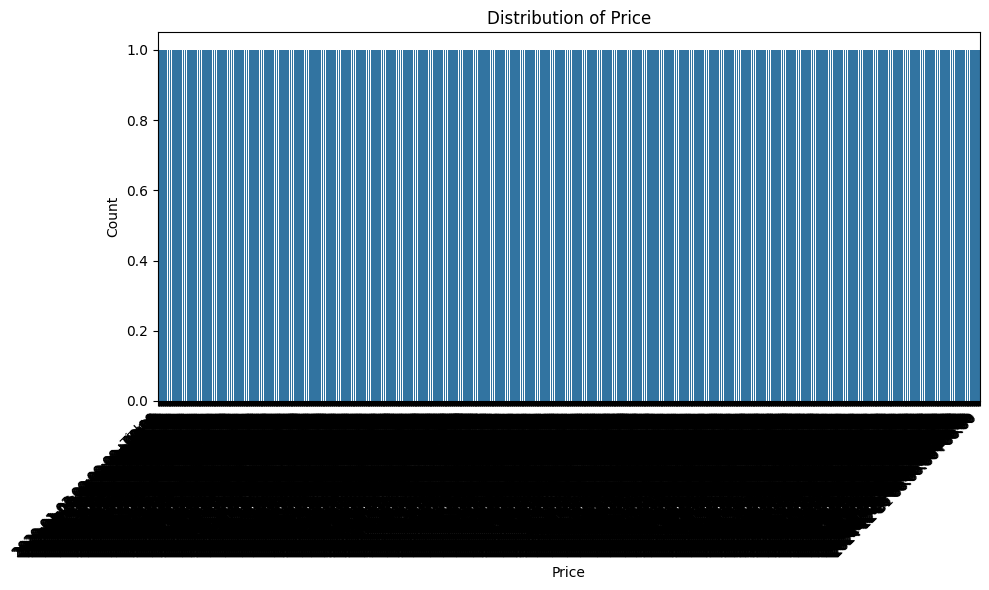

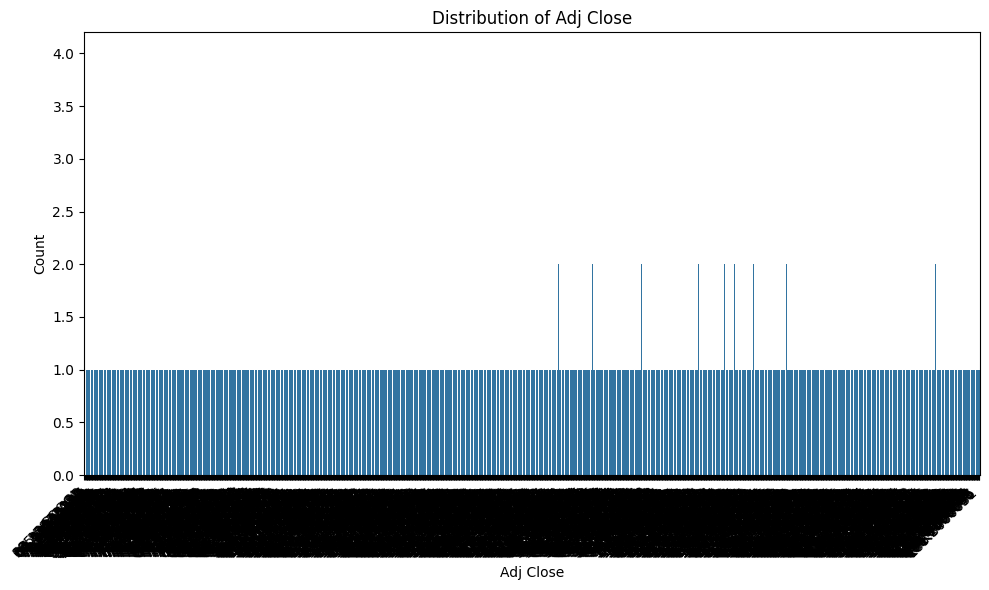

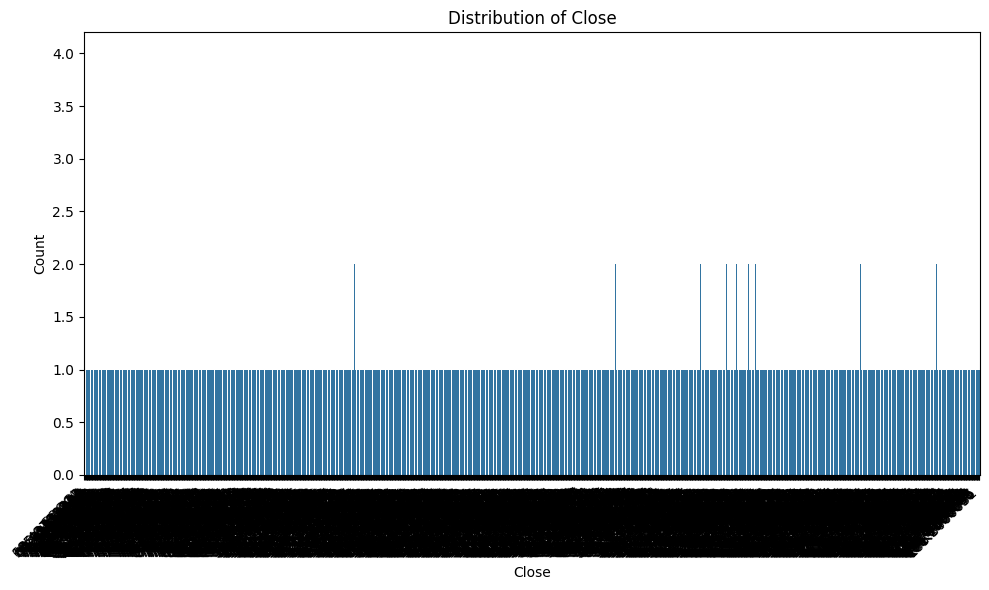

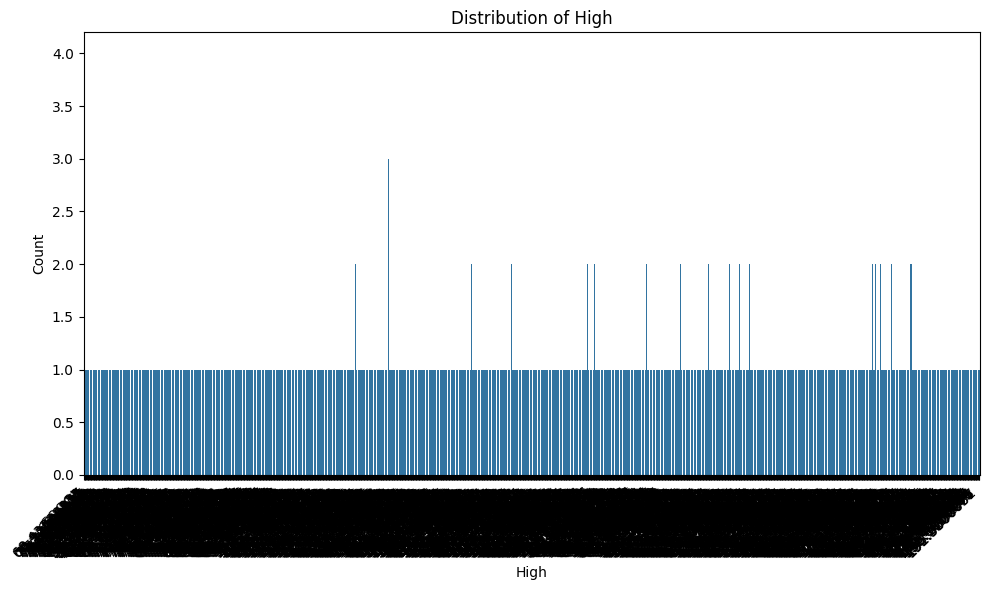

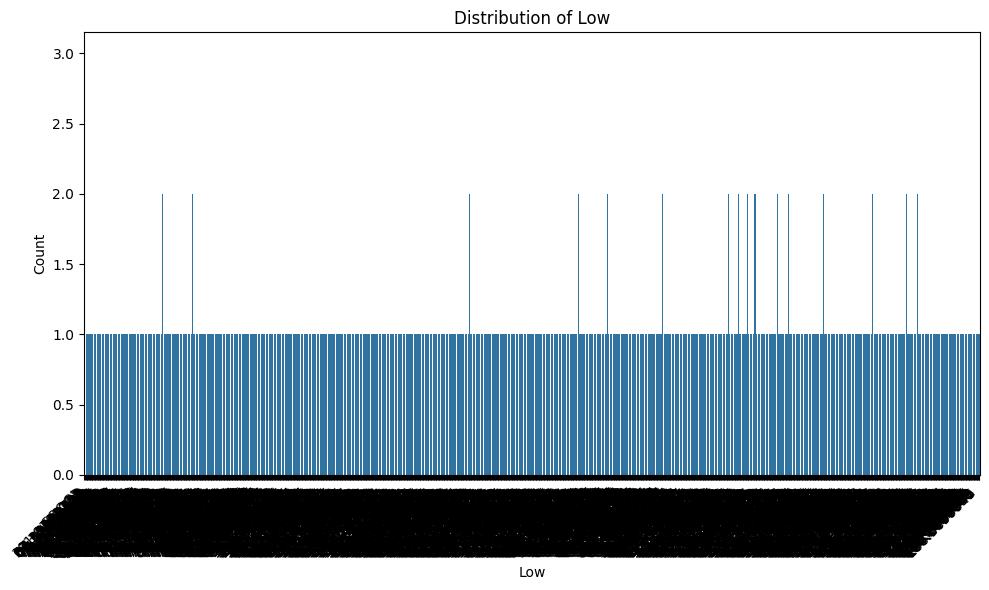

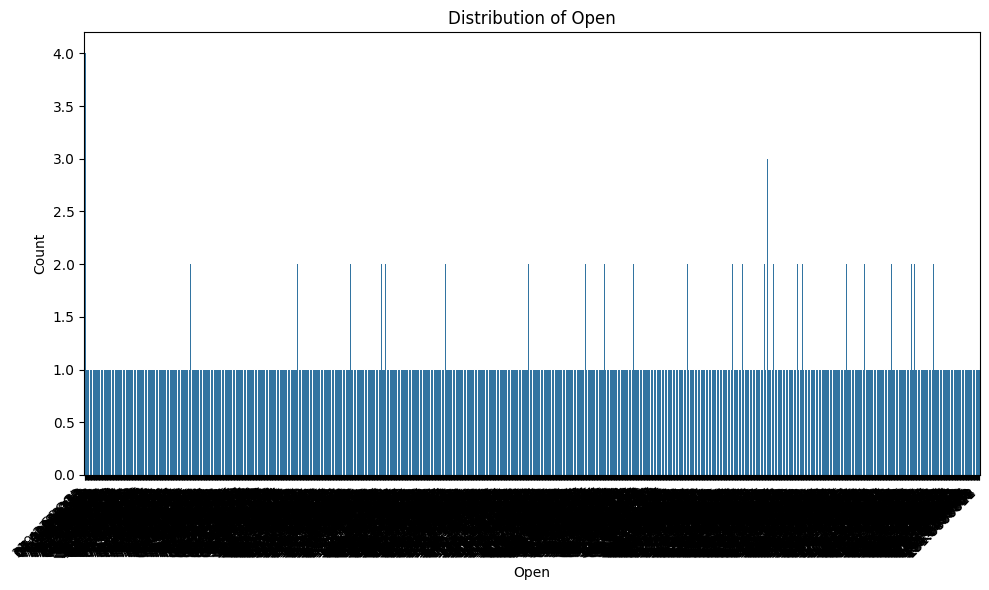

Value counts for Price:
Price
2024-12-31 00:00:00+00:00    1
Ticker                       1
Date                         1
2020-01-02 00:00:00+00:00    1
2020-01-03 00:00:00+00:00    1
                            ..
2020-01-23 00:00:00+00:00    1
2020-01-22 00:00:00+00:00    1
2020-01-21 00:00:00+00:00    1
2020-01-17 00:00:00+00:00    1
2020-01-16 00:00:00+00:00    1
Name: count, Length: 1260, dtype: int64

Value counts for Adj Close:
Adj Close
105.5872421    4
134.5024261    2
128.8030853    2
100.6252289    2
69.06562805    2
              ..
134.9597626    1
136.1678772    1
137.8099365    1
137.230011     1
140.9296265    1
Name: count, Length: 1240, dtype: int64

Value counts for Close:
Close
105.9700012    4
99.97000122    2
123.6699982    2
162.2899933    2
105.4100037    2
              ..
136.661499     1
138.309494     1
137.7274933    1
137.1940002    1
142.0789948    1
Name: count, Length: 1236, dtype: int64

Value counts for High:
High
133            4
142.0800018    3
13

In [19]:
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")

# Bivariate Analysis

Performing Bivariate Analysis: Numerical vs. Numerical

Performing Bivariate Analysis: Numerical vs. Categorical


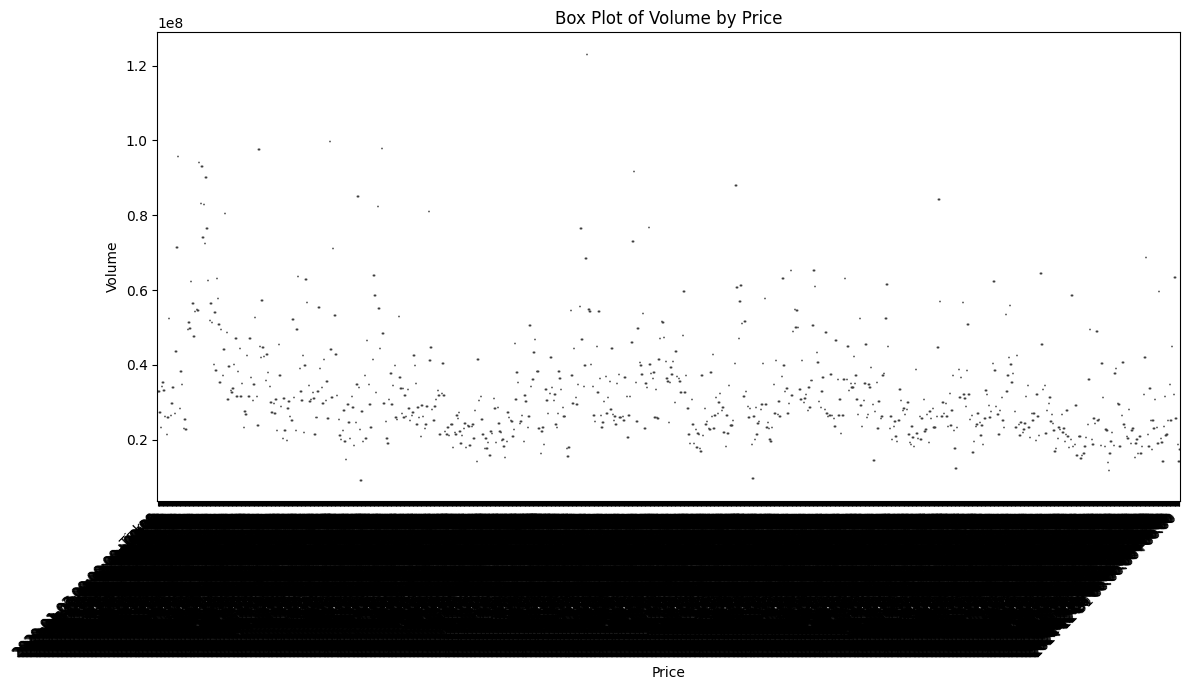

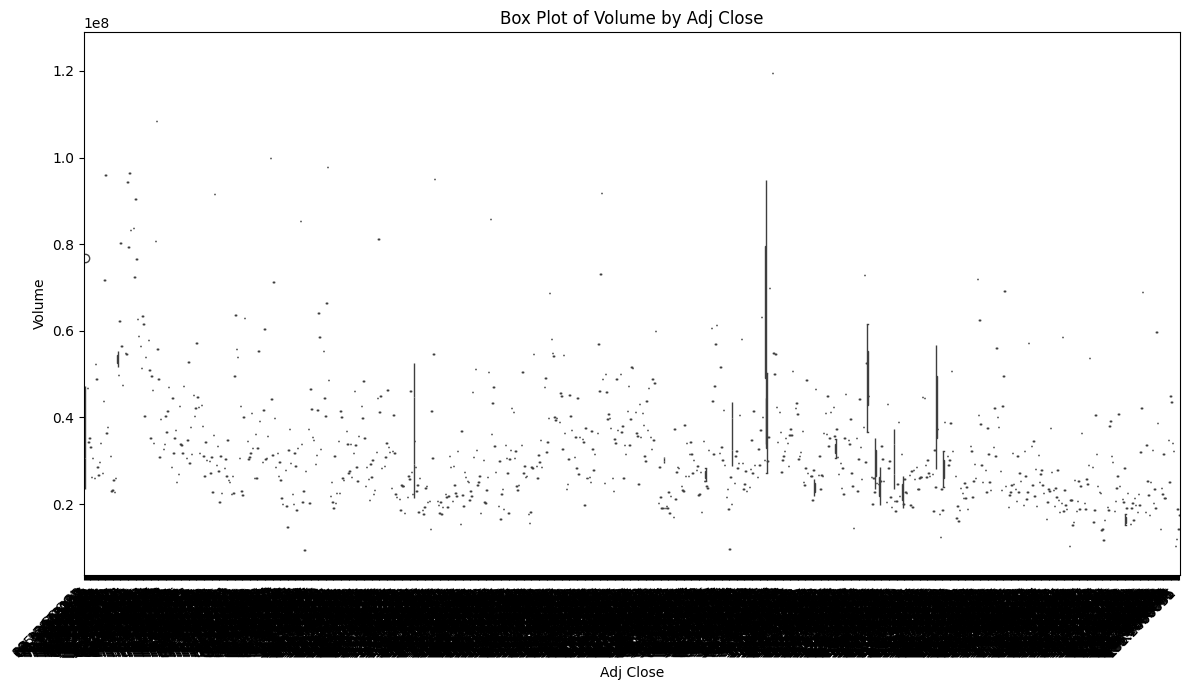

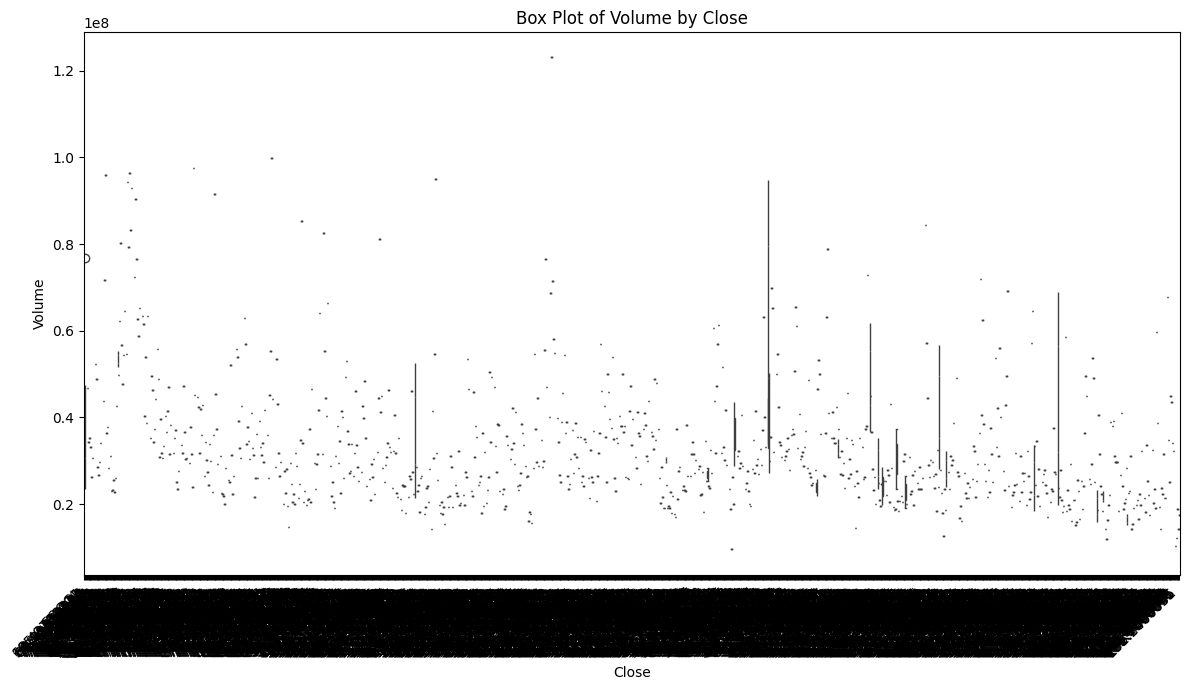

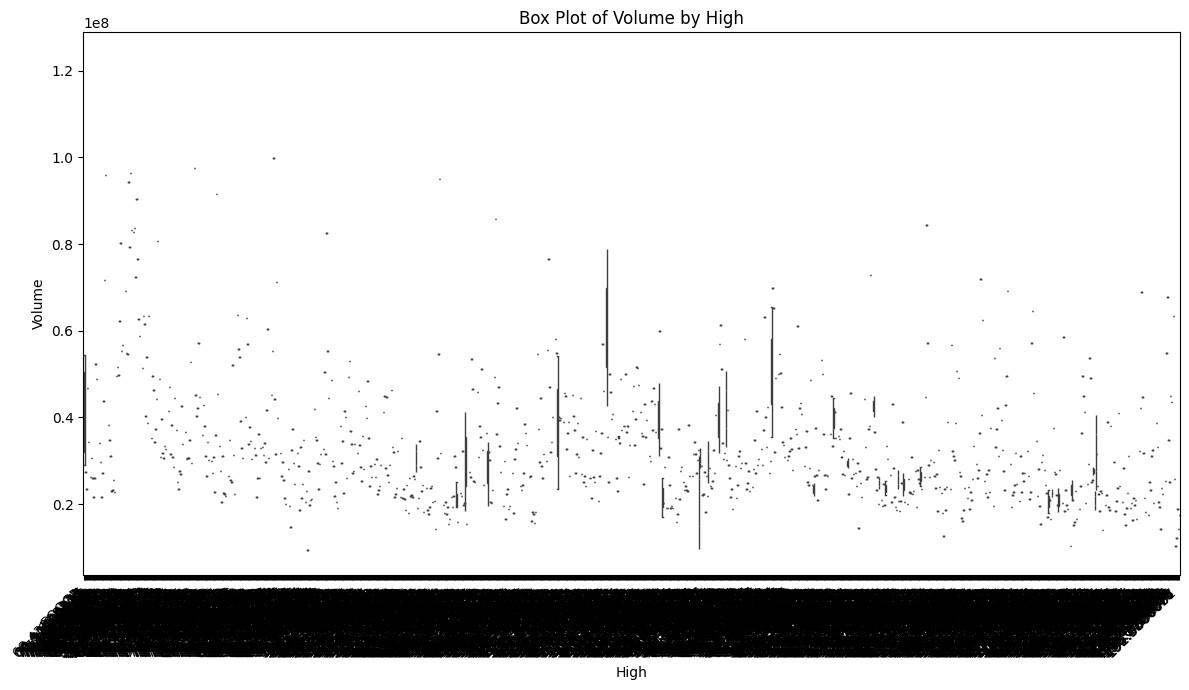

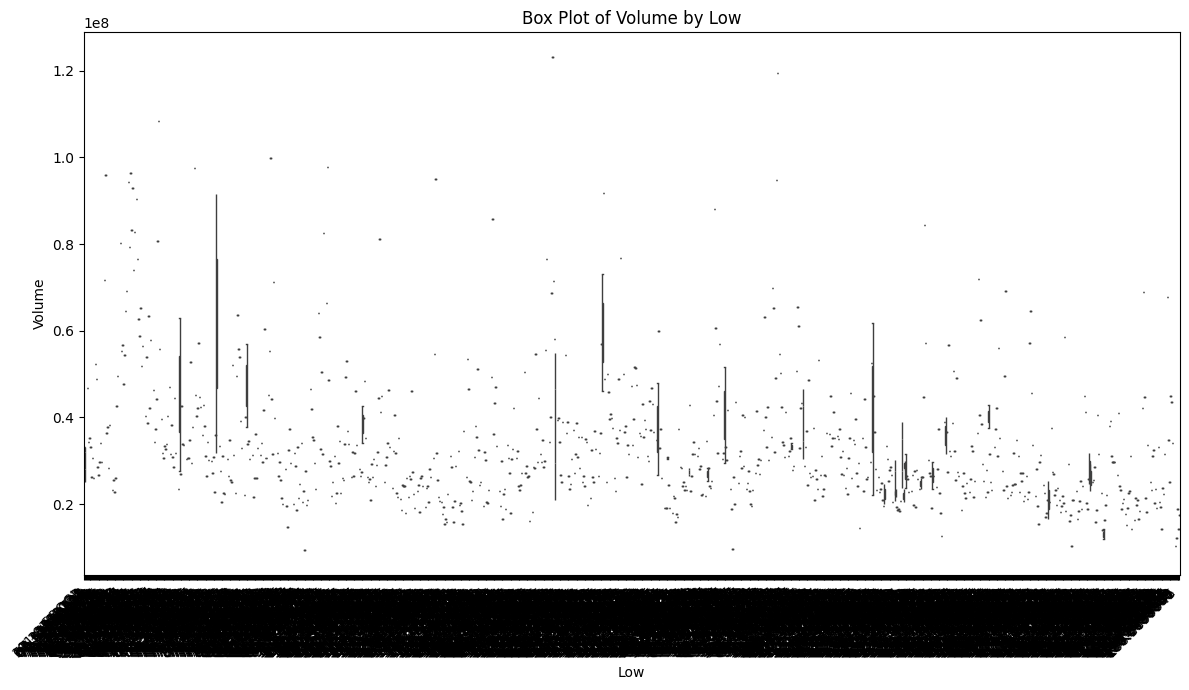

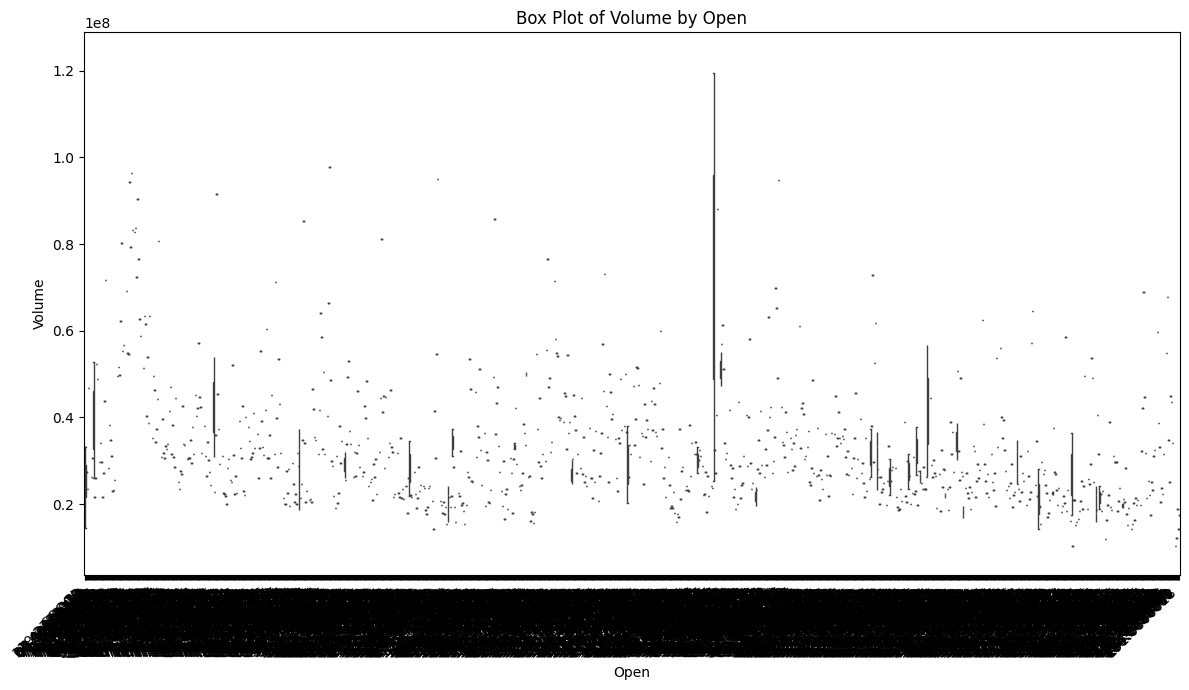

In [20]:
print("Performing Bivariate Analysis: Numerical vs. Numerical")

for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):
        col1 = numerical_cols[i]
        col2 = numerical_cols[j]

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=col1, y=col2)
        plt.title(f'Scatter Plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

print("\nPerforming Bivariate Analysis: Numerical vs. Categorical")

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(12, 7))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'Box Plot of {num_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

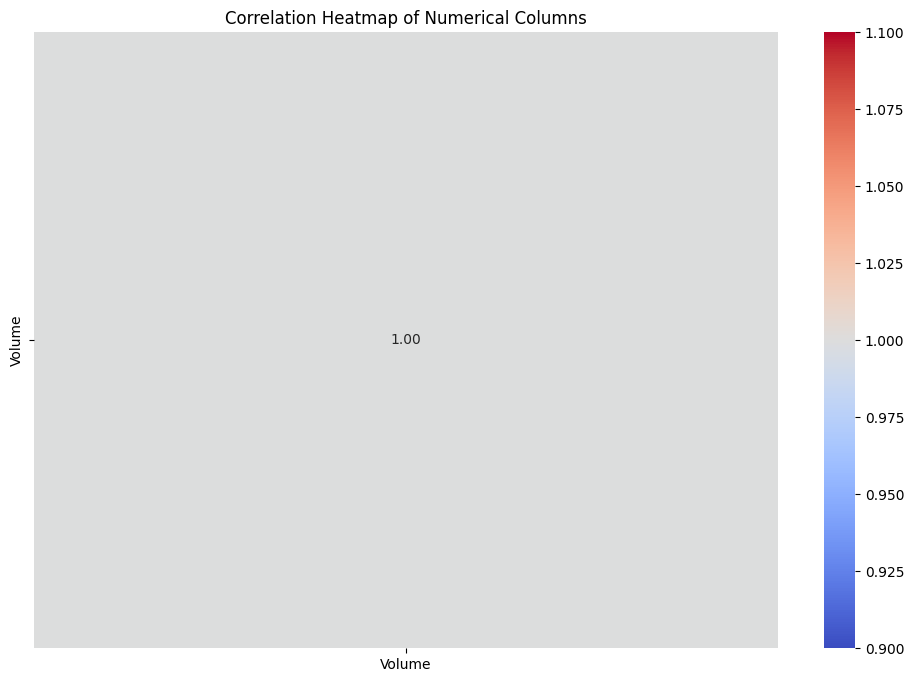

In [21]:
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Thank you